# Linear Regression

In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#creating a Linear Regression object
regg = LinearRegression()

#loading Diabetes dataset from sklearn
data = datasets.load_diabetes()
data.keys()


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
#exracting features and defining them as DataFrame
features=pd.DataFrame(data.data, columns = data.feature_names)

#extracting target values from diabetes dataset
target=pd.DataFrame(data.target,columns=['target'])

#concatenating features and target into a single dataframe
df=pd.concat([features,target],axis=1)

#performing pearson correlation on the dataframe
corr=df.corr('pearson')

#extracting target correlation values for all features
corrs = [abs(corr[i]['target']) for i in list(features)]

#zipping them into tuples and sorting based on correlation to find the most correlated
l = list(zip(corrs,list(features)))
l.sort(key=lambda x:x[0], reverse=True)
print(l)

[(0.5864501344746884, 'bmi'), (0.5658834252428095, 's5'), (0.44148384893088616, 'bp'), (0.43045288474477267, 's4'), (0.3947892506709179, 's3'), (0.38248348424858064, 's6'), (0.2120224810145507, 's1'), (0.18788875071891978, 'age'), (0.17405358696874237, 's2'), (0.04306199845160543, 'sex')]


In [4]:
#BMI shows the highest correlation hence using bmi for Linear Regression
xtr, xte, ytr, yte = train_test_split(features['bmi'].values.reshape(-1,1),target)

#Fitting the model
regg.fit(xtr,ytr)

LinearRegression()

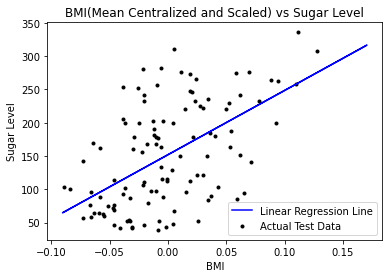

In [5]:
#predicting the target from test features. 
ypr=regg.predict(xte)

#plotting a scatter plot for actual test values
plt.scatter(xte,yte, color = 'black', marker = '.', label='Actual Test Data')
plt.title('BMI(Mean Centralized and Scaled) vs Sugar Level')
plt.xlabel('BMI')
plt.ylabel('Sugar Level')

#plotting the Linear Regression line on the plot
plt.plot(xtr, regg.predict(xtr), color = 'blue', label='Linear Regression Line')
plt.legend()

In [7]:
#Scoring the model based on Actual values with predicted
regg.score(xte,yte)
#The resulting score is considered poor. Finding a better regression model is recommended

0.2695346215424107